In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Excel file
file_path = "/content/Online Retail 2.xlsx"
df = pd.read_excel(file_path)

# Drop missing values (since CustomerID is important for segmentation)
df = df.dropna(subset=['CustomerID'])

# Aggregate data by CustomerID
customer_data = df.groupby("CustomerID").agg({
    "Quantity": "sum",  # Total items purchased
    "UnitPrice": "mean" # Average spending per item
}).reset_index()

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(customer_data[["Quantity", "UnitPrice"]])

# Apply K-Means clustering
k = 4  # Set the number of clusters (adjust based on Elbow method)
kmeans = KMeans(n_clusters=k, random_state=42)
customer_data["Segment"] = kmeans.fit_predict(X)

# Get segment proportions
unique_labels, counts = np.unique(customer_data["Segment"], return_counts=True)
labels = [f"Segment {i}" for i in unique_labels]
colors = ['lightblue', 'orange', 'green', 'red']

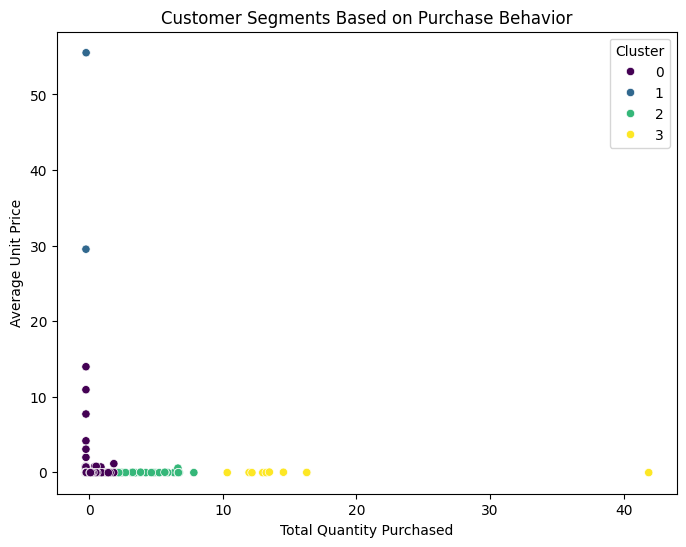

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Excel file
file_path = "/content/Online Retail 2.xlsx"
df = pd.read_excel(file_path)

# Drop missing values (since CustomerID is important for segmentation)
df = df.dropna(subset=['CustomerID'])

# Aggregate data by CustomerID
customer_data = df.groupby("CustomerID").agg({
    "Quantity": "sum",  # Total items purchased
    "UnitPrice": "mean" # Average spending per item
}).reset_index()

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(customer_data[["Quantity", "UnitPrice"]])

# Apply K-Means clustering
k = 4  # Adjust based on Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(X)

# Convert dataset into DataFrame for visualization
df_plot = pd.DataFrame(X, columns=['Total Quantity', 'Avg Unit Price'])
df_plot['Cluster'] = customer_data["Cluster"]  # Add cluster labels

# Scatter plot visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x='Total Quantity', y='Avg Unit Price', hue='Cluster', palette='viridis')
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Average Unit Price")
plt.title("Customer Segments Based on Purchase Behavior")
plt.legend(title="Cluster")
plt.show()

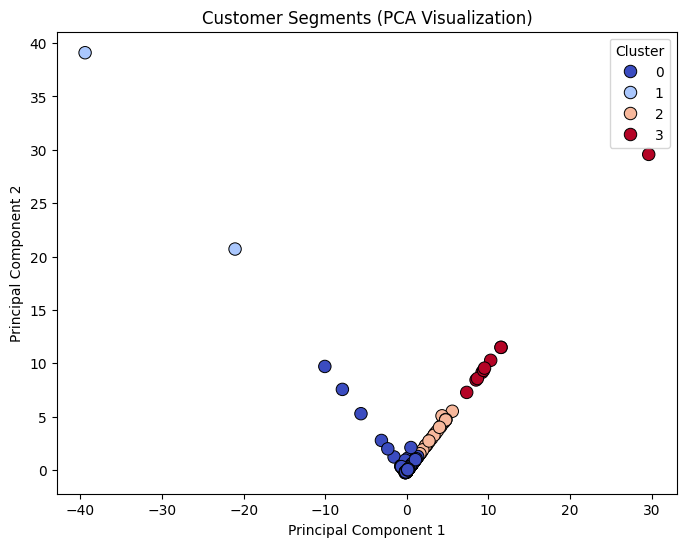

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Excel file
file_path = "/content/Online Retail 2.xlsx"
df = pd.read_excel(file_path)

# Drop missing values (since CustomerID is important for segmentation)
df = df.dropna(subset=['CustomerID'])

# Aggregate data by CustomerID
customer_data = df.groupby("CustomerID").agg({
    "Quantity": "sum",  # Total items purchased
    "UnitPrice": "mean" # Average spending per item
}).reset_index()

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(customer_data[["Quantity", "UnitPrice"]])

# Apply K-Means clustering
k = 4  # Set the number of clusters (adjust based on Elbow method)
kmeans = KMeans(n_clusters=k, random_state=42)
customer_data["Segment"] = kmeans.fit_predict(X)

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = customer_data["Segment"]  # Use correct labels

# Scatter plot for PCA-reduced data
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='coolwarm', s=80, edgecolor='black')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments (PCA Visualization)")
plt.legend(title="Cluster")
plt.show()

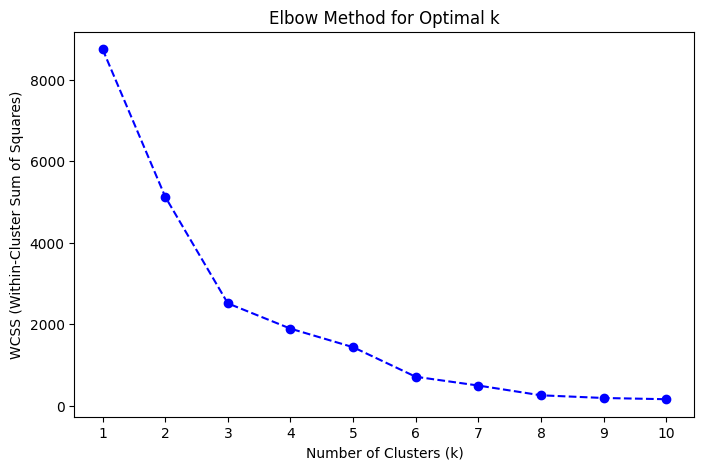

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find optimal k using the Elbow Method
wcss = []  # Stores Within-Cluster Sum of Squares for different k values
K_range = range(1, 11)  # Checking k values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot WCSS vs. k values
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.xticks(K_range)
plt.show()

In [ ]:
import numpy as np

# Assign final clusters based on optimal k
optimal_k = 4  # Change this based on the Elbow Method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data["Segment"] = kmeans.fit_predict(X)

# Compute mean statistics for each segment
segment_analysis = customer_data.groupby("Segment").agg({
    "Quantity": ["mean", "sum"],
    "UnitPrice": ["mean", "max", "min"],
    "CustomerID": "count"
}).rename(columns={"CustomerID": "Customer Count"})

# Display segment summary
print(segment_analysis)

             Quantity             UnitPrice                            \
                 mean      sum         mean          max          min   
Segment                                                                 
0          803.176987  3476150     5.154819  2033.100000     0.122500   
1           29.500000       59  6171.705000  8055.780000  4287.630000   
2        20535.500000   657136     5.735067    87.996861     0.000000   
3        77354.300000   773543     4.548490    11.916236     1.497256   

        Customer Count  
                 count  
Segment                 
0                 4328  
1                    2  
2                   32  
3                   10  


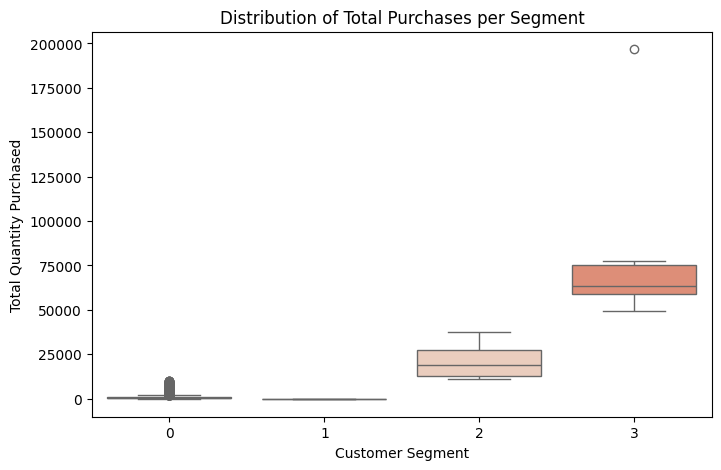

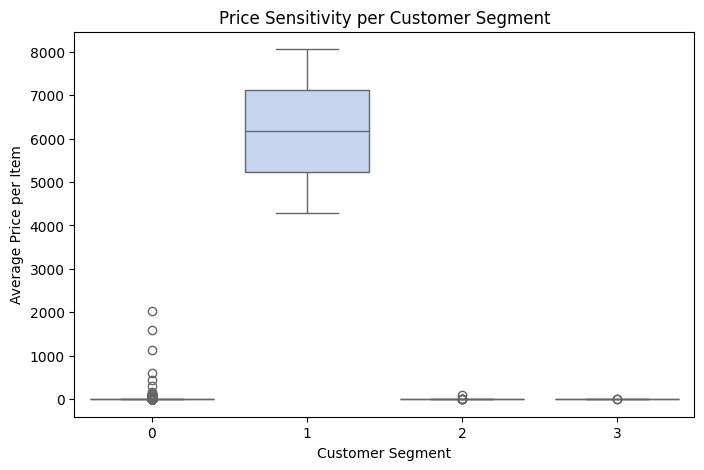

In [ ]:
import seaborn as sns

# Boxplot for Quantity vs. Segment
plt.figure(figsize=(8,5))
sns.boxplot(data=customer_data, x="Segment", y="Quantity", palette="coolwarm")
plt.xlabel("Customer Segment")
plt.ylabel("Total Quantity Purchased")
plt.title("Distribution of Total Purchases per Segment")
plt.show()

# Boxplot for UnitPrice vs. Segment
plt.figure(figsize=(8,5))
sns.boxplot(data=customer_data, x="Segment", y="UnitPrice", palette="coolwarm")
plt.xlabel("Customer Segment")
plt.ylabel("Average Price per Item")
plt.title("Price Sensitivity per Customer Segment")
plt.show()

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("/content/Online Retail 2.xlsx")

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Aggregate by CustomerID
rfm = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

rfm.columns = ['CustomerID', 'TotalQuantity', 'AvgUnitPrice']

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['TotalQuantity', 'AvgUnitPrice']])

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

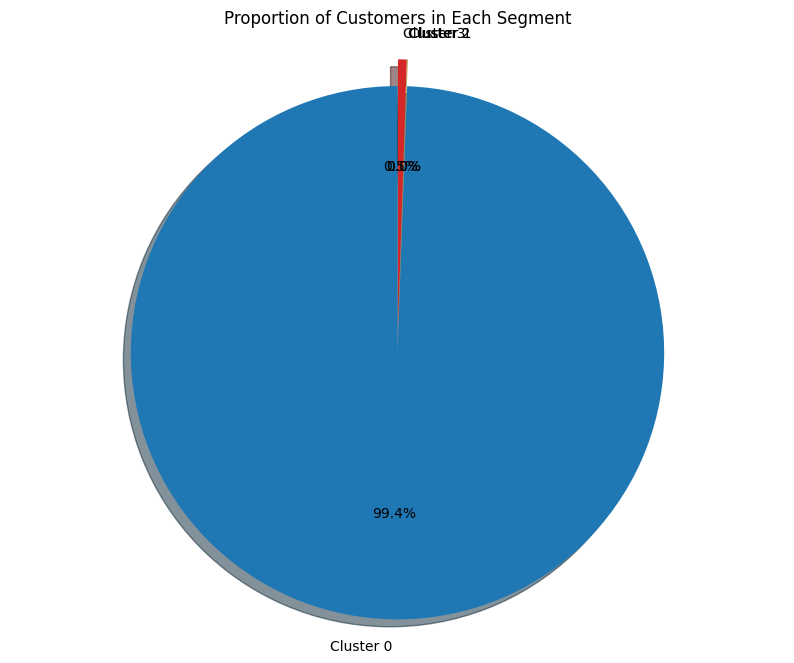

In [ ]:
cluster_counts = rfm['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
plt.pie(
    cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index],
    autopct='%1.1f%%', startangle=90, shadow=True,
    explode=[0.05] * optimal_k
)
plt.title('Proportion of Customers in Each Segment')
plt.axis('equal')
plt.show()

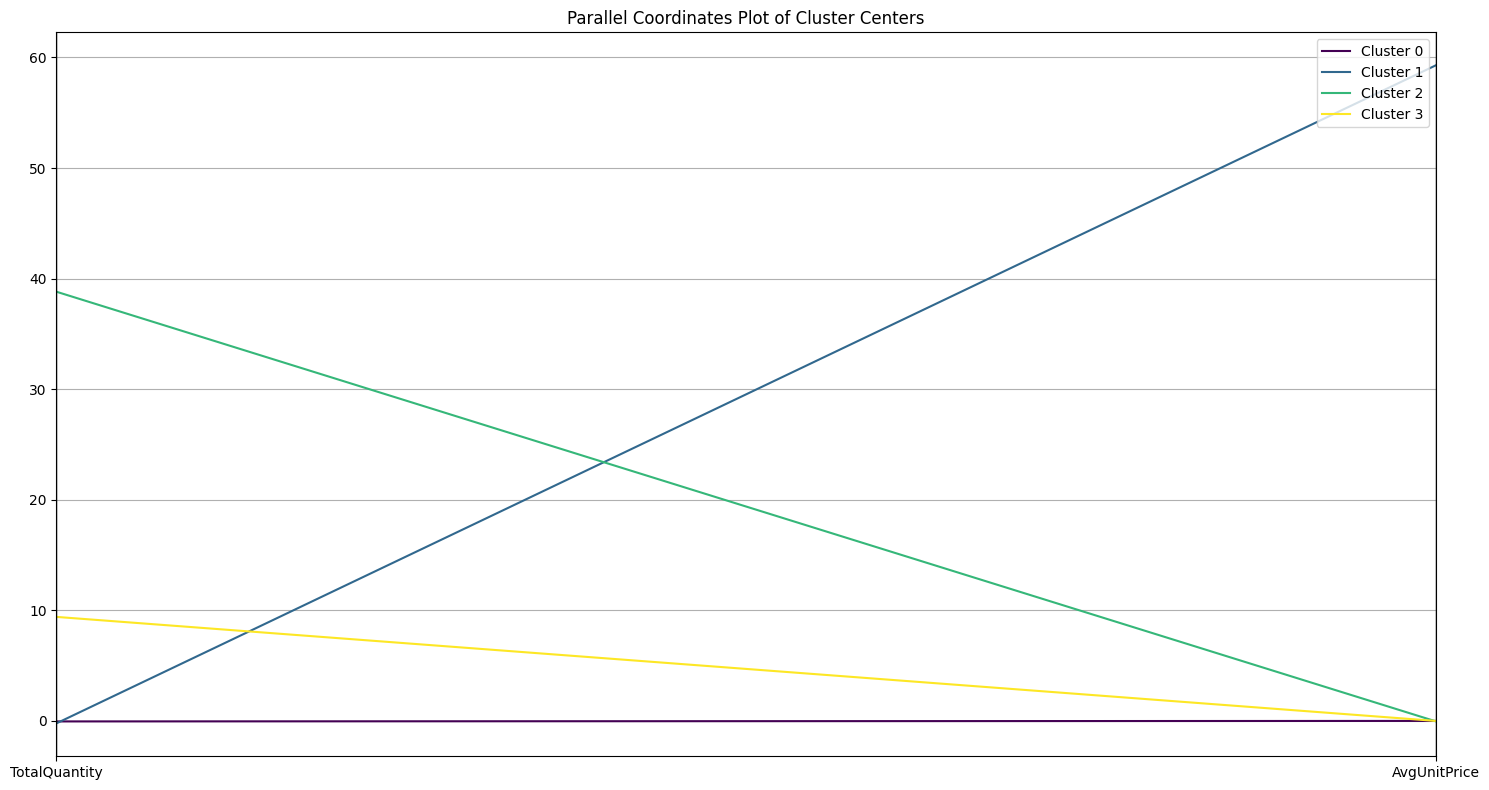

In [ ]:
cluster_centers_scaled = kmeans.cluster_centers_
feature_names = ['TotalQuantity', 'AvgUnitPrice']
cluster_centers_df = pd.DataFrame(cluster_centers_scaled, columns=feature_names)
cluster_centers_df['Cluster'] = [f'Cluster {i}' for i in range(optimal_k)]

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15, 8))
parallel_coordinates(cluster_centers_df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot of Cluster Centers')
plt.grid(True)
plt.tight_layout()
plt.show()

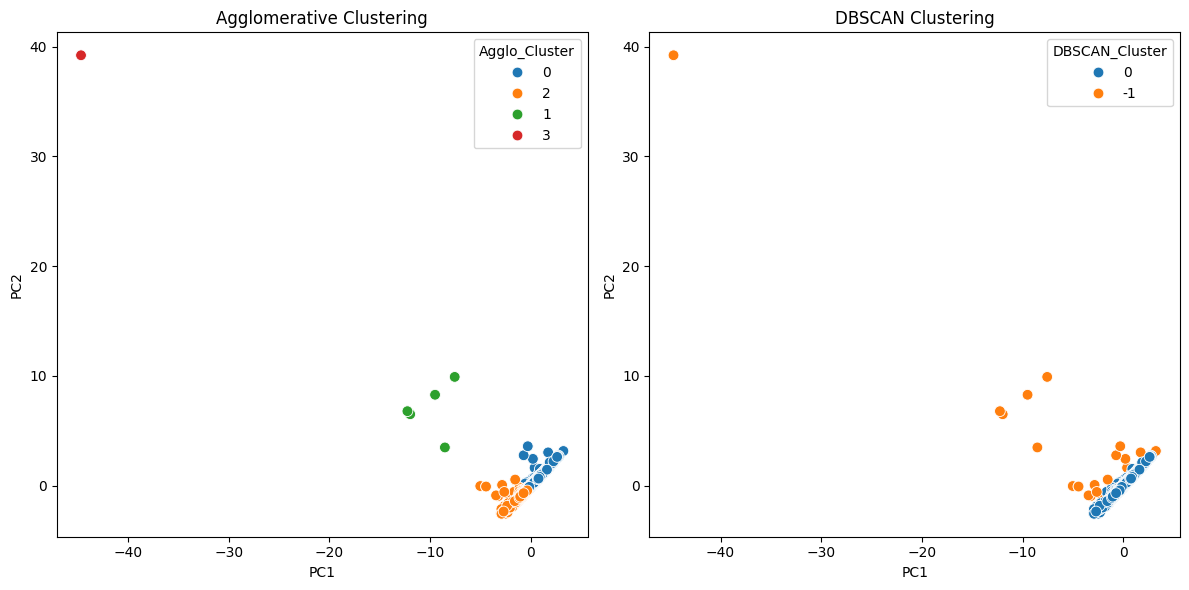

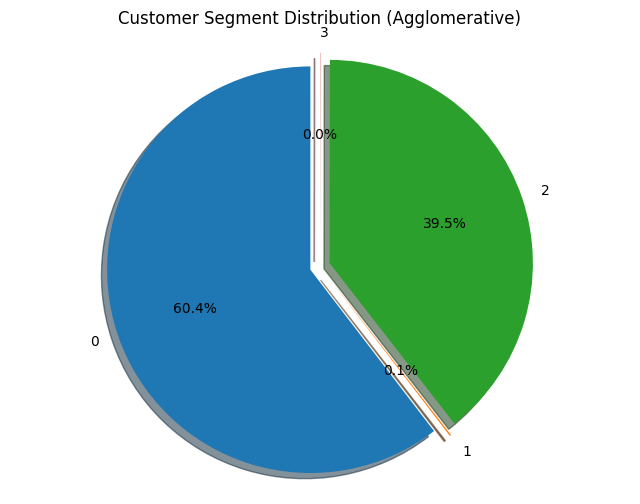

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

# Load dataset
df = pd.read_excel("Online Retail 2.xlsx", usecols=['CustomerID', 'Quantity', 'UnitPrice'])
df.dropna(inplace=True)

# Remove invalid quantity values (<= 0)
df = df[df['Quantity'] > 0]

# Group by CustomerID
rfm = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()
rfm.columns = ['CustomerID', 'TotalQuantity', 'AvgUnitPrice']

# Apply log transformation safely
rfm['LogTotalQuantity'] = np.log1p(rfm['TotalQuantity'])  # log(1 + x), safe for x=0

# Feature scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm[['LogTotalQuantity', 'AvgUnitPrice']])
scaled_df = pd.DataFrame(scaled, columns=['LogTotalQuantity', 'AvgUnitPrice'])

# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)

# --- Agglomerative Clustering ---
agglo = AgglomerativeClustering(n_clusters=4)
rfm['Agglo_Cluster'] = agglo.fit_predict(scaled_df)

# --- PCA for Visualization ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Agglo_Cluster'] = rfm['Agglo_Cluster'].astype(str)
pca_df['DBSCAN_Cluster'] = rfm['DBSCAN_Cluster'].astype(str)

# --- Visualize PCA Clusters ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Agglo_Cluster', palette='tab10', s=60)
plt.title("Agglomerative Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='tab10', s=60)
plt.title("DBSCAN Clustering")
plt.tight_layout()
plt.show()

# --- Pie Chart of Agglomerative Cluster Proportions ---
plt.figure(figsize=(8, 6))
rfm['Agglo_Cluster'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.05]*4
)
plt.title('Customer Segment Distribution (Agglomerative)')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
rfm.groupby('Agglo_Cluster')['TotalQuantity'].describe()

,count,mean,std,min,25%,50%,75%,max
Agglo_Cluster,,,,,,,,
0,2621.0,1887.728729,6410.531364,268.0,454.0,800.0,1594.0,197491.0
1,5.0,806.400000,1734.062513,1.0,1.0,2.0,121.0,3907.0
2,1712.0,134.302570,71.360902,1.0,76.0,131.0,191.0,272.0
3,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [ ]:
rfm['TotalSpend'] = rfm['TotalQuantity'] * rfm['AvgUnitPrice']
rfm.groupby('Agglo_Cluster')['TotalSpend'].describe()

,count,mean,std,min,25%,50%,75%,max
Agglo_Cluster,,,,,,,,
0,2621.0,6383.899362,39137.499306,0.00,1254.800853,2266.982308,4485.183418,1.449214e+06
1,5.0,344329.128000,740044.915787,451.42,464.900000,590.000000,52592.650000,1.667547e+06
2,1712.0,472.179833,420.575666,3.75,223.391250,396.463636,617.995057,8.408133e+03
3,1.0,2033.100000,NaN,2033.10,2033.100000,2033.100000,2033.100000,2.033100e+03


In [ ]:
rfm.groupby('Agglo_Cluster')['AvgUnitPrice'].mean().sort_values(ascending=False)

,AvgUnitPrice
Agglo_Cluster,
3,2033.100000
1,414.556000
2,4.203746
0,3.079762


In [ ]:
rfm['TotalSpend'] = rfm['TotalQuantity'] * rfm['AvgUnitPrice']
print(rfm[['TotalQuantity', 'TotalSpend']].corr())

               TotalQuantity  TotalSpend
TotalQuantity       1.000000    0.409003
TotalSpend          0.409003    1.000000


In [ ]:
rfm.groupby('Agglo_Cluster')['TotalSpend'].mean().sort_values(ascending=False)

,TotalSpend
Agglo_Cluster,
1,344329.128000
0,6383.899362
3,2033.100000
2,472.179833



📊 Correlation between Quantity & Spend:
                TotalQuantity  TotalSpend
TotalQuantity       1.000000    0.409003
TotalSpend          0.409003    1.000000

💸 Avg Unit Price by Cluster:

Agglo_Cluster
3    362.027949
0      4.412471
1      3.290708
2      1.938882
Name: AvgUnitPrice, dtype: float64

🛒 Avg Total Spend by Cluster:

Agglo_Cluster
3    132951.689615
1      8892.200244
2       735.215474
0       646.168792
Name: TotalSpend, dtype: float64


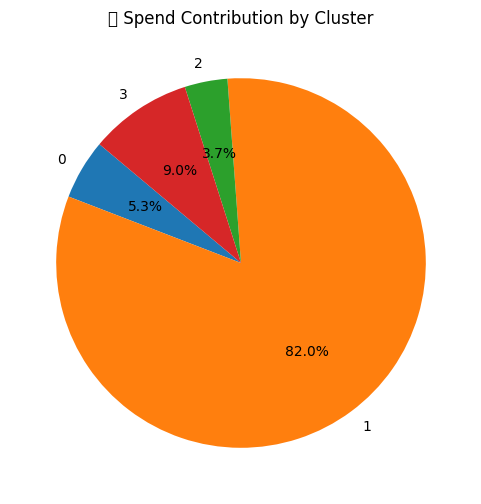

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assuming rfm dataframe is already created and has the required columns ---

# 1. Log Transformation to reduce skewness
rfm['LogTotalQuantity'] = np.log1p(rfm['TotalQuantity'])
rfm['LogAvgUnitPrice'] = np.log1p(rfm['AvgUnitPrice'])

# 2. Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm[['LogTotalQuantity', 'LogAvgUnitPrice']])
scaled_df = pd.DataFrame(scaled_features, columns=['LogTotalQuantity', 'LogAvgUnitPrice'])

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
rfm['Agglo_Cluster'] = agglo.fit_predict(scaled_df)

# 4. Recompute TotalSpend and Correlation
rfm['TotalSpend'] = rfm['TotalQuantity'] * rfm['AvgUnitPrice']
correlation = rfm[['TotalQuantity', 'TotalSpend']].corr()
print("\n📊 Correlation between Quantity & Spend:\n", correlation)

# 5. Cluster-wise Summary Stats
print("\n💸 Avg Unit Price by Cluster:\n")
print(rfm.groupby('Agglo_Cluster')['AvgUnitPrice'].mean().sort_values(ascending=False))

print("\n🛒 Avg Total Spend by Cluster:\n")
print(rfm.groupby('Agglo_Cluster')['TotalSpend'].mean().sort_values(ascending=False))

# 6. Optional: Pie Chart for Spending Distribution
spend_by_cluster = rfm.groupby('Agglo_Cluster')['TotalSpend'].sum()
plt.figure(figsize=(6,6))
plt.pie(spend_by_cluster, labels=spend_by_cluster.index, autopct='%1.1f%%', startangle=140)
plt.title('🧾 Spend Contribution by Cluster')
plt.show()